# Prediction Challenge

This challenge involved predicting US ETFs returns using price and implied volatility features. In essence, we needed to create a model to predict a weighting between –1 to 1 for each asset at each timestamp.

First, I tried a linear regression model with Scikit-Learn but did not do really well. Then, using Scikit-Learn, I try a GradientBoostingRegressor which I optimised by using Grid

In [1]:
import pandas as pd  # Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data/prediction_train_with_targets.csv")

In [3]:
data.shape # Dataframe 178 columns

(33827, 178)

Text(0.5, 0, 'Data')

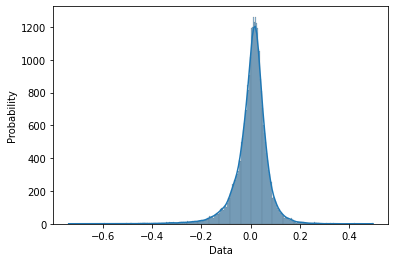

In [8]:
sns.histplot(data["target_20"],kde=True)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')


In [18]:

from sklearn.linear_model import LinearRegression
X, y = data.iloc[:, :-1], data["target_20"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [20]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.19
Test set score: 0.17


In [26]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.435
Accuracy on test set: 0.355


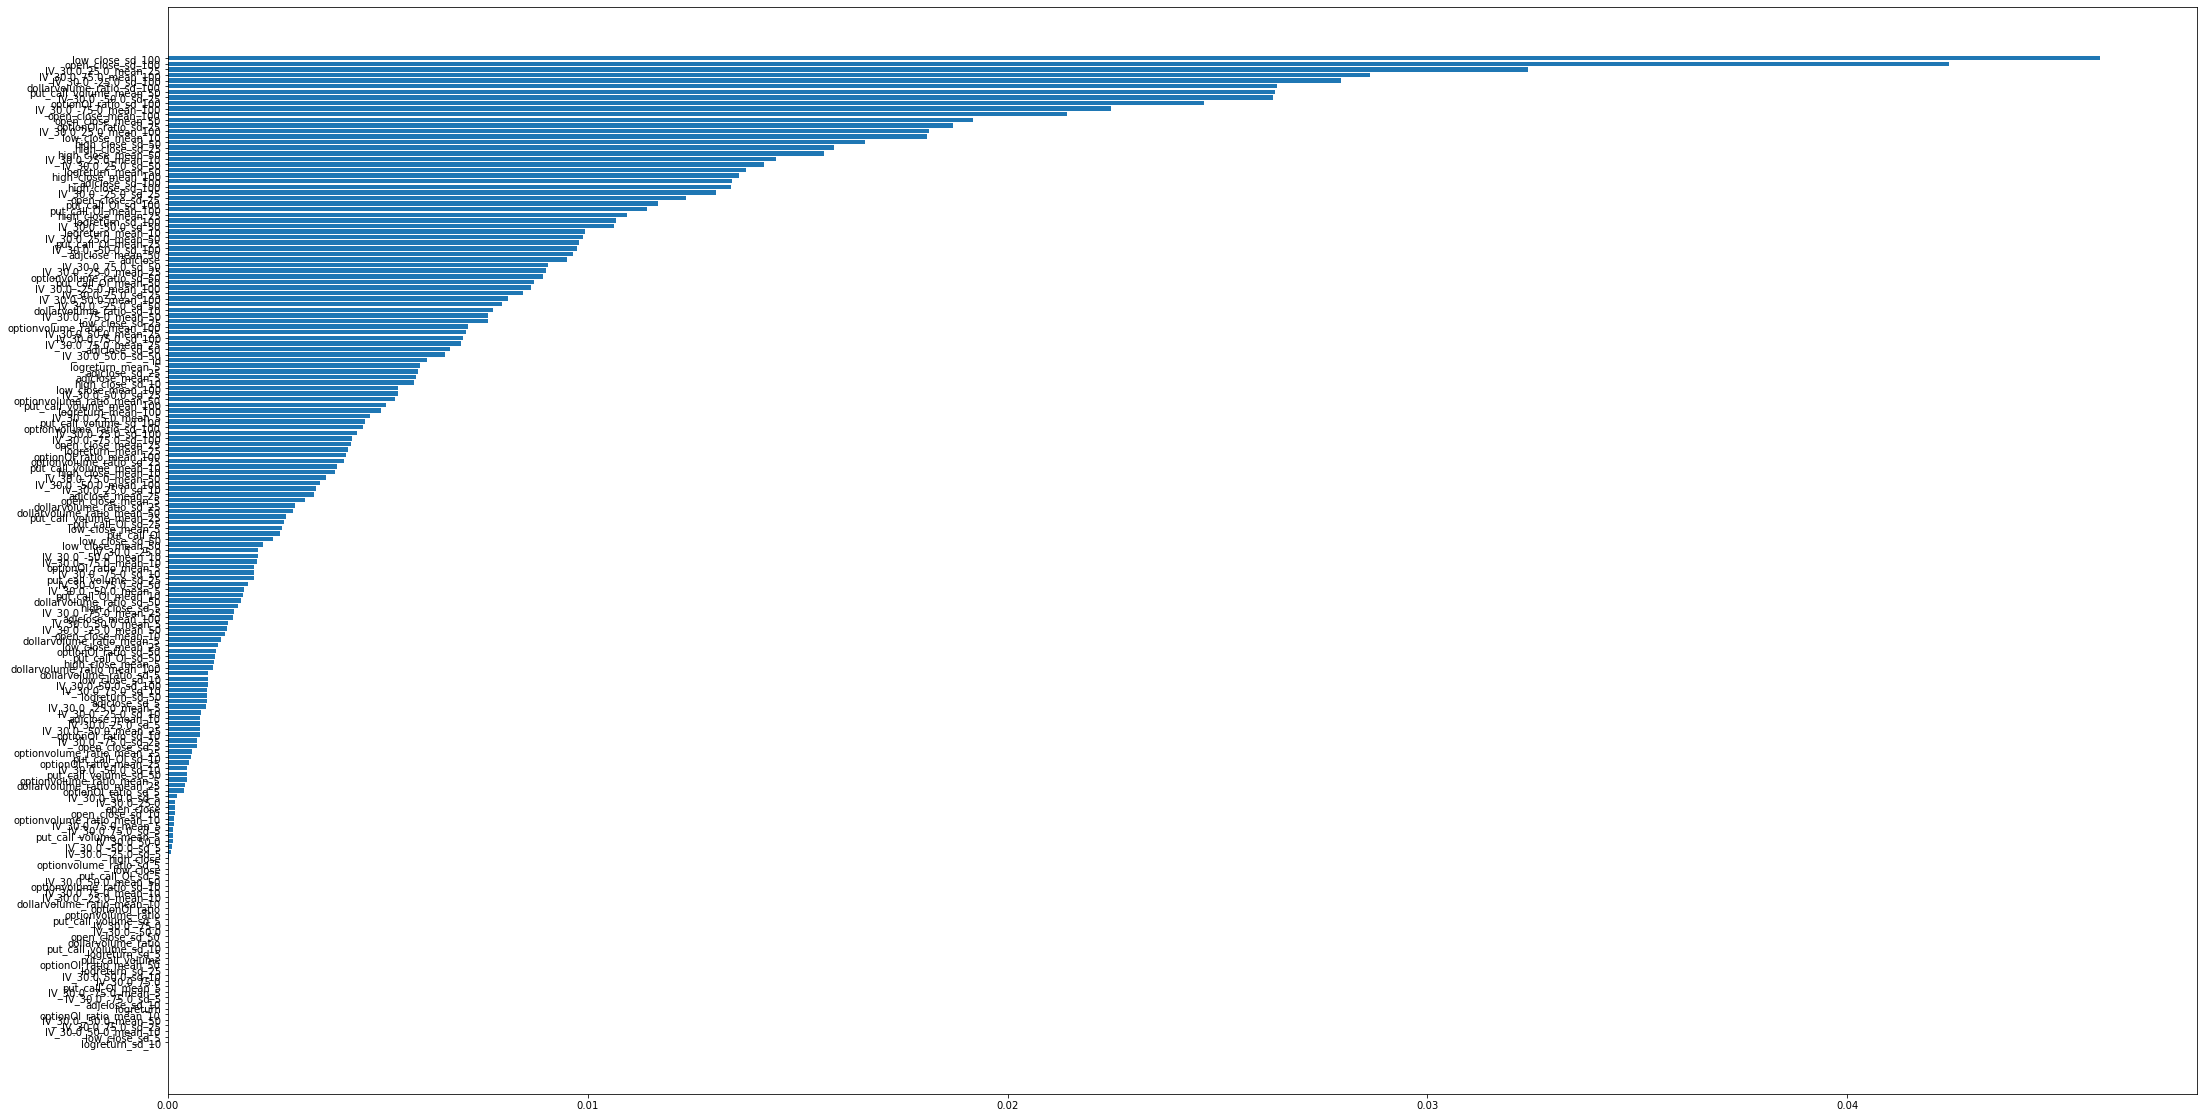

In [41]:
plt.figure(figsize=(80,20))

feature_importance = gbrt.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
# plt.title('Feature Importance (MDI)')

# result = permutation_importance(reg, X_test, y_test, n_repeats=10,
#                                 random_state=42, n_jobs=2)
# sorted_idx = result.importances_mean.argsort()
# plt.subplot(1, 2, 2)
# plt.boxplot(result.importances[sorted_idx].T,
#             vert=False, labels=np.array(diabetes.feature_names)[sorted_idx])
# plt.title("Permutation Importance (test set)")
# fig.tight_layout()
plt.show()

In [46]:
np.array(data.columns)[sorted_idx]

array(['logreturn_sd_10', 'low_close_sd_5', 'IV_30.0_50.0_mean_10',
       'IV_30.0_75.0_sd_25', 'IV_30.0_-50.0_mean_50',
       'optionOI_ratio_mean_10', 'logreturn', 'adjclose_sd_10',
       'IV_30.0_-75.0_sd_5', 'IV_30.0_-75.0_mean_5', 'put_call_OI_mean_5',
       'IV_30.0_75.0', 'IV_30.0_50.0_sd_10', 'logreturn_sd_25',
       'optionOI_ratio_mean_50', 'put_call_volume', 'logreturn_sd_5',
       'put_call_volume_sd_10', 'dollarvolume_ratio', 'open_close_sd_50',
       'IV_30.0_-50.0', 'IV_30.0_-75.0', 'put_call_volume_sd_5',
       'optionvolume_ratio', 'optionOI_ratio',
       'dollarvolume_ratio_mean_10', 'IV_30.0_-25.0_mean_10',
       'IV_30.0_75.0_mean_10', 'optionvolume_ratio_sd_10',
       'IV_30.0_50.0_mean_50', 'put_call_OI_sd_5', 'low_close',
       'optionvolume_ratio_sd_5', 'high_close', 'IV_30.0_-25.0_sd_5',
       'IV_30.0_-50.0_sd_5', 'IV_30.0_50.0', 'put_call_volume_mean_5',
       'IV_30.0_75.0_sd_5', 'IV_30.0_75.0_mean_5',
       'optionvolume_ratio_mean_10', 'open

In [51]:
columns2 = ['IV_30.0_25.0_mean_50', 'logreturn_mean_10', 'IV_30.0_-50.0_sd_50',
       'logreturn_sd_100', 'high_close_mean_25', 'put_call_OI_mean_100',
       'put_call_OI_sd_100', 'open_close_sd_25', 'IV_30.0_-25.0_sd_25',
       'high_close_sd_100', 'adjclose_sd_100', 'high_close_mean_100',
       'logreturn_mean_50', 'IV_30.0_25.0_sd_50', 'IV_30.0_25.0_mean_10',
       'high_close_mean_50', 'high_close_sd_25', 'high_close_sd_50',
       'low_close_mean_10', 'IV_30.0_25.0_mean_100',
       'optionOI_ratio_sd_25', 'open_close_mean_50',
       'open_close_mean_100', 'IV_30.0_-75.0_mean_100',
       'optionOI_ratio_sd_100', 'IV_30.0_-50.0_sd_25',
       'put_call_volume_mean_50', 'dollarvolume_ratio_sd_100',
       'IV_30.0_-25.0_sd_100', 'IV_30.0_75.0_mean_100',
       'IV_30.0_25.0_mean_25', 'open_close_sd_100', 'low_close_sd_100']

In [62]:
X, y = data[columns2], data["target_20"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
gbrt = GradientBoostingRegressor(random_state=0, max_depth=14)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.849


In [72]:

# param_grid = {'max_depth': [14],
#               'learning_rate': [0.1],
#               'n_estimators': [200]}


# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, verbose=10, n_jobs=-1)

In [73]:
# X, y = data[columns2], data["target_20"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# grid_search.fit(X_train, y_train)
# print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
# print("Best parameters: {}".format(grid_search.best_params_))
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  2.3min remaining: 15.2min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.4min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  3.5min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  3.5min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.5min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  4.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.6min finished


Test set score: 0.85
Best parameters: {'learning_rate': 0.1, 'max_depth': 14, 'n_estimators': 200}
Best cross-validation score: 0.83


Test set score: 0.85
Best parameters: {'learning_rate': 0.1, 'max_depth': 14}
Best cross-validation score: 0.83

Best parameters: {'learning_rate': 0.1, 'max_depth': 14, 'n_estimators': 200}


In [114]:
X, y = data[columns2], data["target_20"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
gbrt = GradientBoostingRegressor(random_state=0, learning_rate= 0.1, max_depth= 14, n_estimators= 200)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.853


Accuracy on training set: 0.997
Accuracy on test set: 0.849

In [83]:
from algothon2021prediction import Prediction

In [115]:
class MyPrediction(Prediction):
    def __init__(self,**parms):
        super(MyPrediction, self).__init__(**parms)
    
    def predict(self,data):
        return gbrt.predict(data[columns2])

In [116]:
Model = MyPrediction()

In [119]:
a = Model.run_test()

In [120]:
b = Model.run_validate()

In [124]:
# b.to_csv("SAR_validation_prediction.csv", index=False)
# a.to_csv("SAR_test_prediction.csv", index=False)